# Project Documentation: Intel Image Classification Using CNN #
(a) Problem Statement

Overview
The objective of this project is to build and train a Convolutional Neural Network (CNN) to classify images into six different categories: buildings, forest, glacier, mountain, sea, and street. The aim is to achieve high accuracy in classifying these natural scene images, leveraging the powerful feature extraction capabilities of CNNs.

Dataset Description
The dataset used for this project is the "Intel Image Classification" dataset available on Kaggle. It contains approximately 25,000 images of size 150x150 pixels, distributed across six categories. The dataset is split into three parts:

Training set: Contains around 14,000 images.
Test set: Contains around 3,000 images.
Prediction set: Contains around 7,000 images.

Objectives
Build and train a CNN model to classify images into the six categories.
Achieve high classification accuracy on the test set.



#import Libraries

In [1]:
import os
from PIL import Image, UnidentifiedImageError
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

In [3]:
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

(b) Algorithm of the Solution

Step 1: Data Preparation

** Load Images:

The dataset contains images categorized into six classes: buildings, forest, glacier, mountain, sea, and street.
Images are loaded from the provided training and test directories using the load_images_and_labels function. This function iterates over the files in each directory, opens each image, resizes it to 150x150 pixels, normalizes its pixel values, and appends the image and its label to the respective lists.

** Resize Images:

Each image is resized to a uniform size of 150x150 pixels using the Python Imaging Library (PIL). This is important for feeding the images into the CNN, which requires fixed-size input.

** Normalize Pixel Values:

Pixel values are normalized to the range [0, 1] by dividing by 255. This helps in speeding up the convergence of the neural network during training.
One-Hot Encode Labels:

Class labels are converted into one-hot encoded vectors using TensorFlow's to_categorical function. This is necessary for multi-class classification, where the output layer has multiple neurons corresponding to each class.

Functions to Load Images and Skip Non-Image Files

In [4]:
def load_images_and_labels(directory_dict):
    images = []
    labels = []
    
    for label, directory in directory_dict.items():
        file_list = os.listdir(directory)  # Load all files in the directory
        for filename in tqdm(file_list, desc=f"Loading images from {directory}"):
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path)
                img = img.resize((150, 150))  # Resize image to 150 x 150
                img = np.array(img) / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(class_names_label[label])
            except UnidentifiedImageError:
                print(f"Skipping file {img_path} as it is not a valid image.")
    
    return np.array(images), np.array(labels)


Load and One-Hot Encode Labels

In [5]:
# Paths to different image categories
train_dirs = {
    'buildings': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/buildings',
    'forest': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/forest',
    'glacier': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/glacier',
    'mountain': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/mountain',
    'sea': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/sea',
    'street': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/street'
}

test_dirs = {
    'buildings': '//Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_test/seg_test/buildings',
    'forest': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_test/seg_test/forest',
    'glacier': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_test/seg_test/glacier',
    'mountain': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_test/seg_test/mountain',
    'sea': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_test/seg_test/sea',
    'street': '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_test/seg_test/street'
}

pred_dir = '/Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_pred'

### Load and Preprocess All Images for Training and Testing

One-Hot Encode Labels:

Class labels are converted into one-hot encoded vectors using TensorFlow's to_categorical function. This is necessary for multi-class classification, where the output layer has multiple neurons corresponding to each class.

In [6]:
# Load all images for training and testing
train_images, train_labels = load_images_and_labels(train_dirs)
test_images, test_labels = load_images_and_labels(test_dirs)

# One-hot encode the labels
train_labels = to_categorical(train_labels, nb_classes)
test_labels = to_categorical(test_labels, nb_classes)

# Verify the shapes of the datasets
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Loading images from /Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/buildings: 100%|██████████| 2191/2191 [00:01<00:00, 1243.79it/s]
Loading images from /Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/forest: 100%|██████████| 2271/2271 [00:02<00:00, 944.15it/s] 
Loading images from /Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/glacier: 100%|██████████| 2404/2404 [00:02<00:00, 1156.16it/s]
Loading images from /Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/mountain: 100%|██████████| 2512/2512 [00:02<00:00, 970.77it/s] 
Loading images from /Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/sea: 100%|██████████| 2274/2274 [00:03<00:00, 683.29it/s]
Loading images from /Users/rameshchidurala/Documents/DSC-550 Assignments/archive-2/seg_train/seg_train/street: 100%|██████████| 2382/2382 [00:04<00:00, 572.13it/s]
Loading i

Train images shape: (14034, 150, 150, 3)
Train labels shape: (14034, 6)
Test images shape: (3000, 150, 150, 3)
Test labels shape: (3000, 6)


 ### Plot Images from Each Category of train and test sets

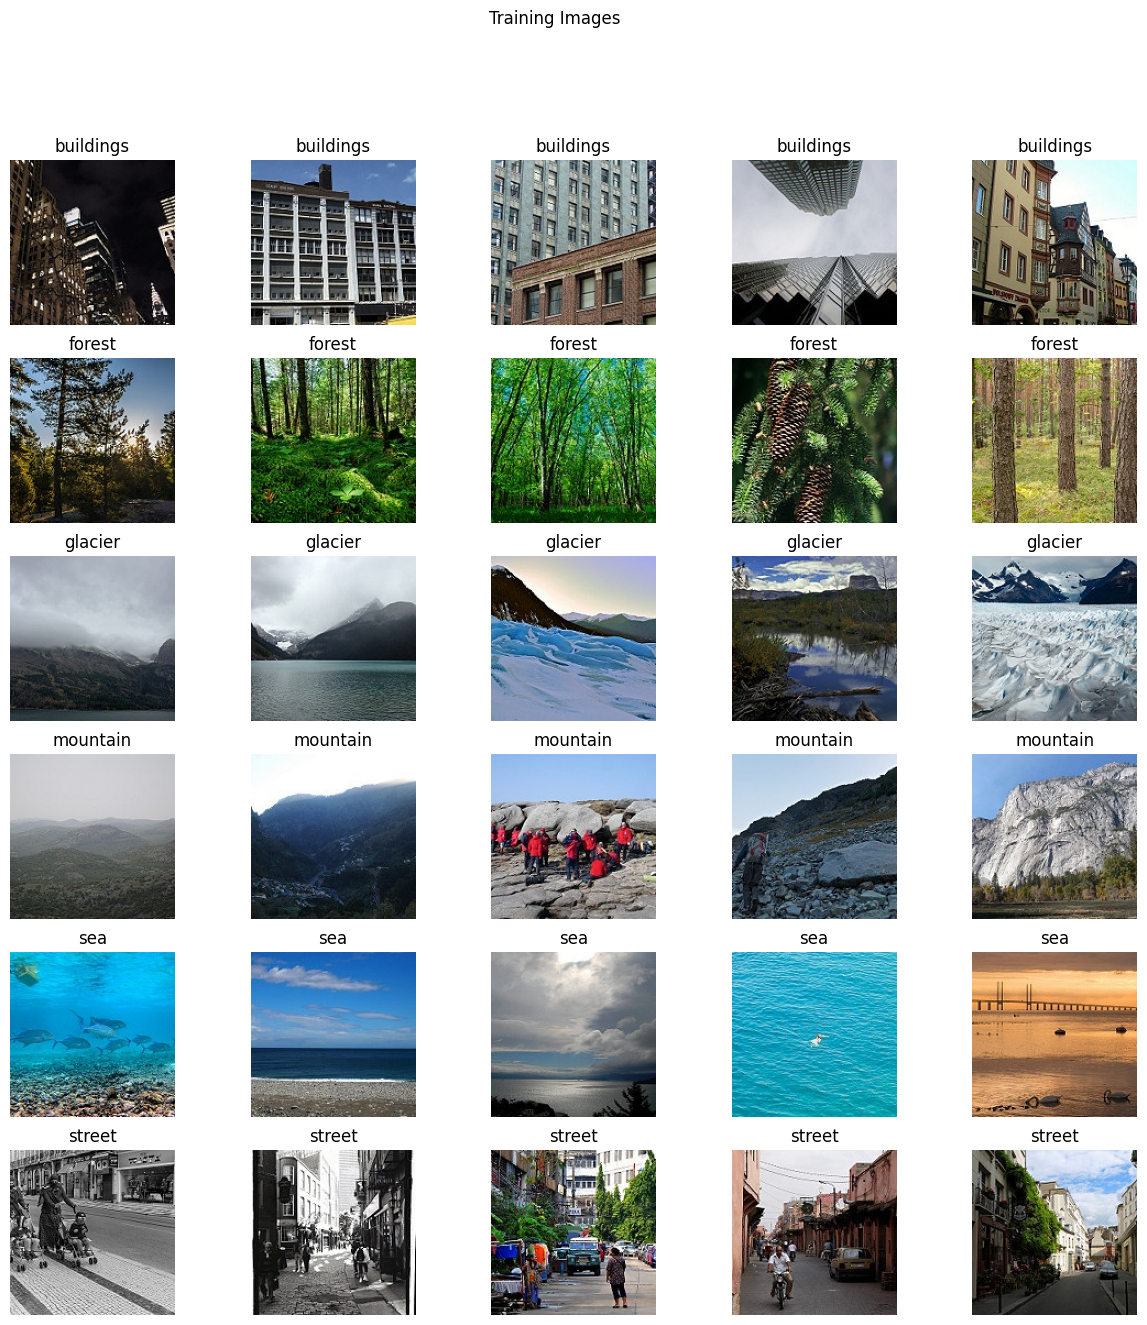

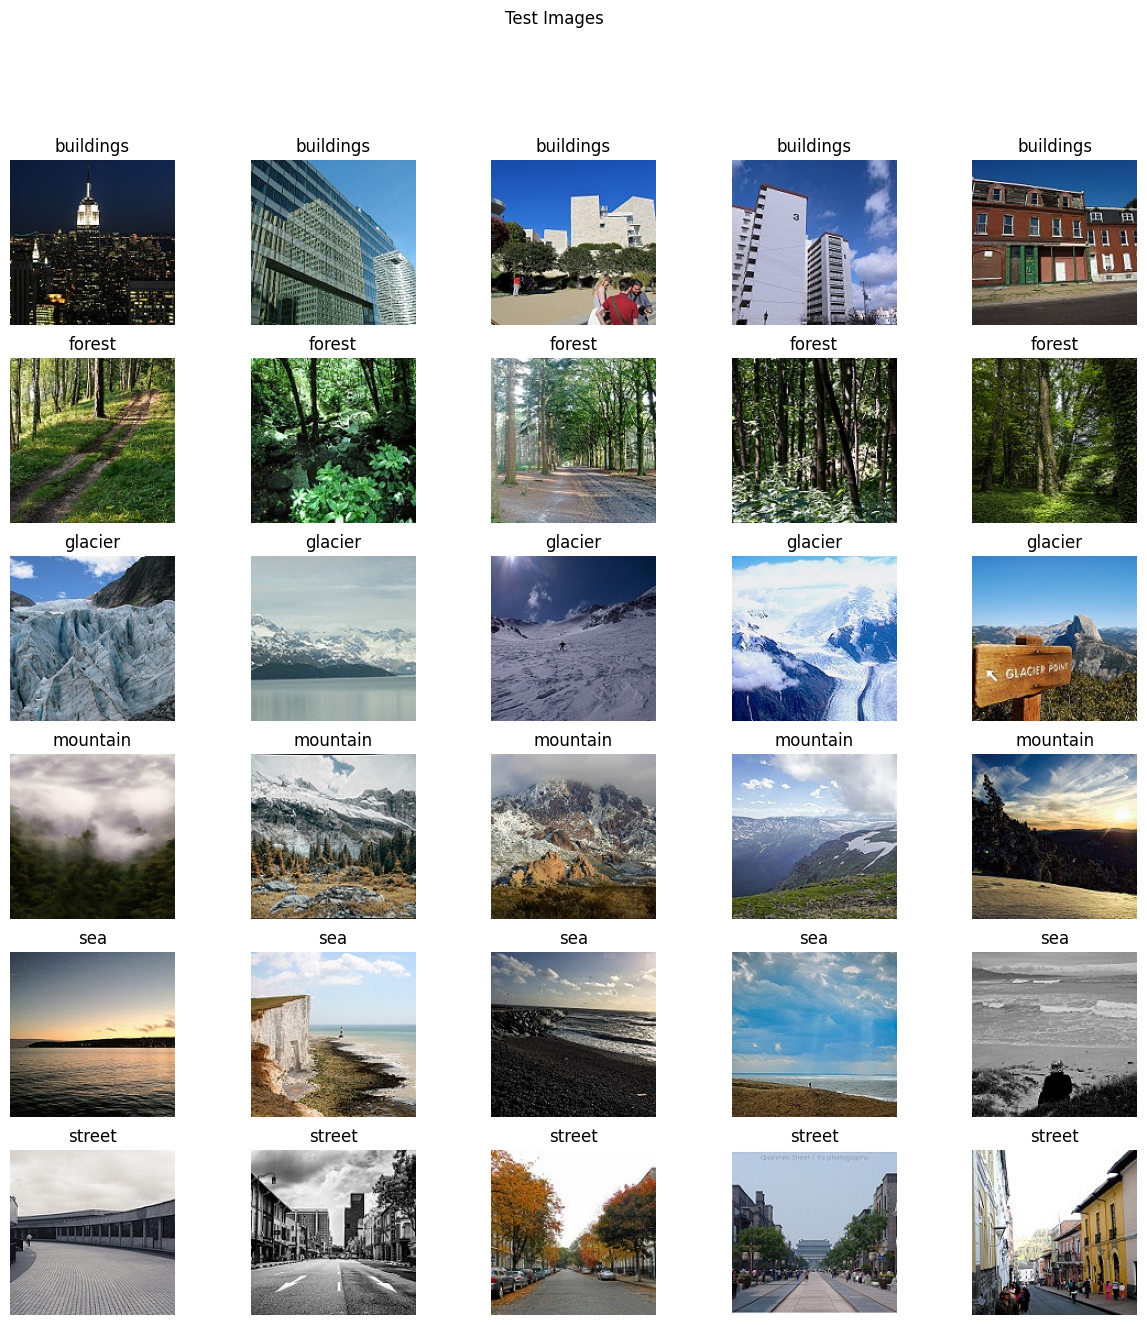

In [14]:
def plot_images(images, labels, categories, title):
    plt.figure(figsize=(15, 15))
    num_categories = len(categories)
    images_per_category = 5
    
    for i, category in enumerate(categories):
        category_indices = np.where(np.argmax(labels, axis=1) == i)[0][:images_per_category]
        for j, idx in enumerate(category_indices):
            plt.subplot(num_categories, images_per_category, i * images_per_category + j + 1)
            plt.imshow(images[idx])
            plt.title(category)
            plt.axis('off')
    
    plt.suptitle(title)
    plt.show()

# Plot training images
plot_images(train_images, train_labels, class_names, 'Training Images')

# Plot test images
plot_images(test_images, test_labels, class_names, 'Test Images')


### Step 2: Model Building

Initialize a Sequential CNN Model:

A Sequential model is chosen because it allows us to build the CNN layer by layer.

1. Add Convolutional Layers:

Four convolutional layers are added. Each layer uses a set of filters (32, 64, 128, and 256 filters respectively) with a kernel size of 3x3, ReLU activation, and same padding.
Max-pooling layers are added after each convolutional layer to downsample the feature maps, reducing their dimensionality and retaining the most important information.

2. Flatten the Output:

The output from the final convolutional layer is flattened into a 1D array. This is necessary to connect the convolutional layers with the fully connected dense layers.
3. Add Fully Connected Layer:

A dense layer with 512 units and ReLU activation is added. This layer learns complex representations from the features extracted by the convolutional layers.
4. Add Dropout Layer:

A dropout layer with a rate of 0.5 is added to prevent overfitting by randomly setting half of the input units to 0 during training.
Add Output Layer:

5. A softmax output layer with six units is added. Each unit corresponds to one of the six classes. The softmax activation function ensures that the output values are probabilities that sum to 1.

I experimented with different kernel sizes to improve accuracy and ultimately settled on the one that performed best. Initially, I set the number of epochs to 85 as per the assignment requirements and left it running overnight. However, it continued for almost 40 epochs. After observing minimal changes in val_accuracy and val_loss beyond the first ten epochs, I decided to interupt the kernel. The model was consuming significant computational power without showing any significant improvement in accuracy, instead fluctuating around the same values.

So if you see error messege dont worry about its because I interupted the kernel.

8. About the pooling Choice

Type of Pooling Used: Max Pooling

Explanation:

Max Pooling:

Max pooling is a down-sampling technique that selects the maximum value from a patch of the feature map. It reduces the spatial dimensions (width and height) while retaining the most important features. This is done by applying a max filter (usually 2x2) with a stride of 2, which effectively halves the dimensions of the input feature map.
Why Max Pooling?:

Preserves Important Features:

Max pooling helps in preserving the most prominent features detected by the convolutional layers. By selecting the maximum value in each patch, it ensures that the most significant features are retained, which are likely to be critical for accurate classification.
Reduces Overfitting:

By reducing the spatial dimensions, max pooling decreases the number of parameters and computations in the network, which helps to mitigate overfitting. This reduction also leads to faster training times.
Translation Invariance:

Max pooling provides a form of translation invariance, meaning the presence of a feature is detected regardless of its precise location. This is particularly useful in image classification tasks where objects might appear at different positions within an image.
Advantages of Max Pooling:

Reduces Dimensionality:

Significantly reduces the spatial dimensions of the feature maps, leading to a decrease in computational requirements and faster processing times.
Retains Strong Features:

Focuses on the most prominent features within each patch, which are crucial for the next layers in the network.
Simplicity:

Max pooling is simple to implement and integrates well with other layers in the neural network.
Disadvantages of Max Pooling:

Information Loss:

While reducing the dimensions, max pooling might discard some useful information since only the maximum value in each patch is retained.
Spatial Detail Loss:

Fine spatial details might be lost, which can sometimes be important for certain tasks that require precise localization information.

Other Pooling Methods:
Average Pooling:

Average pooling calculates the average value of the elements in each patch. It is less aggressive compared to max pooling and retains more contextual information from the feature map.
Advantages: Preserves more information about the presence of features.
Disadvantages: Might not emphasize the most salient features as strongly as max pooling.
Global Pooling:

Global pooling (Global Max Pooling or Global Average Pooling) applies a pooling operation over the entire spatial dimensions of the feature map, reducing it to a single value per feature map.

In [15]:
# Initialize the CNN
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=nb_classes, activation='softmax'))



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Step 3: Model Compilation
Compile the Model:

The model is compiled using the Adam optimizer, which is efficient and well-suited for large datasets and high-dimensional parameter spaces.
The loss function used is categorical cross-entropy, which is appropriate for multi-class classification tasks.
The accuracy metric is used to evaluate the performance of the model during training and validation.

In [16]:
# Compile the CNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,008,838 (42.00 MB)

 Trainable params: 11,008,838 (42.00 MB)

 Non-trainable params: 0 (0.00 B)

*** Note ***

Interupted model after 40 epochs that I mentined in the model building.

### Step 4: Model Training
Train the Model:

The model is trained for 85 epochs on the training data. During training, the validation data (test set) is used to monitor the performance of the model on unseen data.

In [11]:
# Train the model for 85 epochs
cnn_model = model.fit(
    train_images, train_labels,
    epochs=85,
    validation_data=(test_images, test_labels)
)

Epoch 1/85
439/439 ━━━━━━━━━━━━━━━━━━━━ 198s 449ms/step - accuracy: 0.5399 - loss: 1.1782 - val_accuracy: 0.7133 - val_loss: 0.7535
Epoch 2/85
439/439 ━━━━━━━━━━━━━━━━━━━━ 195s 444ms/step - accuracy: 0.7316 - loss: 0.7190 - val_accuracy: 0.7863 - val_loss: 0.5788
Epoch 3/85
439/439 ━━━━━━━━━━━━━━━━━━━━ 192s 436ms/step - accuracy: 0.8066 - loss: 0.5431 - val_accuracy: 0.8163 - val_loss: 0.5072
Epoch 4/85
439/439 ━━━━━━━━━━━━━━━━━━━━ 500s 1s/step - accuracy: 0.8371 - loss: 0.4396 - val_accuracy: 0.8203 - val_loss: 0.4988
Epoch 5/85
439/439 ━━━━━━━━━━━━━━━━━━━━ 176s 400ms/step - accuracy: 0.8699 - loss: 0.3594 - val_accuracy: 0.8453 - val_loss: 0.4491
Epoch 6/85
439/439 ━━━━━━━━━━━━━━━━━━━━ 189s 431ms/step - accuracy: 0.9000 - loss: 0.2831 - val_accuracy: 0.8400 - val_loss: 0.4775
Epoch 7/85
439/439 ━━━━━━━━━━━━━━━━━━━━ 193s 440ms/step - accuracy: 0.9209 - loss: 0.2247 - val_accuracy: 0.8620 - val_loss: 0.4759
Epoch 8/85
439/439 ━━━━━━━━━━━━━━━━━━━━ 2233s 5s/step - accuracy: 0.9370 - loss

KeyboardInterrupt: 

In [12]:
# Save the trained model
model.save('trained_cnn_model.h5')

### Step 4: Model Training
Train the Model:

The model is trained for 10 epochs on the training data. During training, the validation data (test set) is used to monitor the performance of the model on unseen data. 
I ran the model once again with 10 epochs since 85 epochs is not doing any good and taking lot of computational power and also I dont wont to run again above model for further steps . So I run it for 10 epochs to proceed with further steps.

I also tried batch size, validation split and early stopping it making no good to model and the accuracy is worse after implementing those steps.
so i removed those parameters.

In [18]:
from timeit import default_timer as timer 
# Train the model for 10 epochs
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 238s 538ms/step - accuracy: 0.5079 - loss: 1.2111 - val_accuracy: 0.7317 - val_loss: 0.7050
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 221s 503ms/step - accuracy: 0.7384 - loss: 0.7104 - val_accuracy: 0.8043 - val_loss: 0.5426
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 252s 572ms/step - accuracy: 0.8078 - loss: 0.5340 - val_accuracy: 0.8163 - val_loss: 0.5245
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 250s 568ms/step - accuracy: 0.8466 - loss: 0.4299 - val_accuracy: 0.8387 - val_loss: 0.4646
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 249s 566ms/step - accuracy: 0.8587 - loss: 0.3736 - val_accuracy: 0.8393 - val_loss: 0.4659
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 238s 542ms/step - accuracy: 0.9021 - loss: 0.2793 - val_accuracy: 0.8477 - val_loss: 0.4443
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 226s 514ms/step - accuracy: 0.9212 - loss: 0.2291 - val_accuracy: 0.8490 - val_loss: 0.4842
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 213s 484ms/step - accuracy: 0.9342 -

In [19]:
# Save the trained model
model.save('trained_cnn_model2.h5')

### Step 5: Model Evaluation
Evaluate the Model:

After training, the model is evaluated on the test set to determine its final accuracy and loss.
This step helps in understanding how well the model generalizes to new, unseen data.

94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8615 - loss: 0.5306
Test Accuracy: 0.8496666550636292


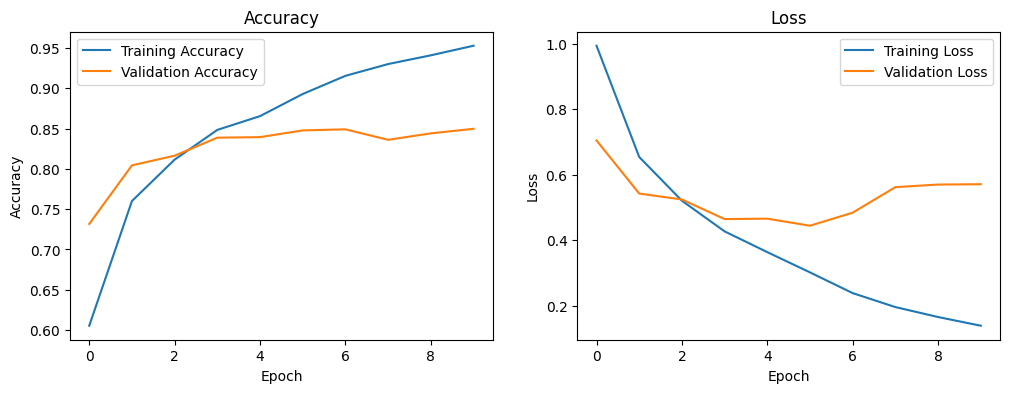

In [20]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()



### Step 6: Test the model on the test set and display some sample images ###
The code generates predictions for the test images using the trained CNN model and defines a function to plot a random sample of these images along with their true and predicted labels. The function selects random indices from the test set, retrieves the corresponding images and labels, and displays them in a 2x3 grid with appropriate titles. This visualization helps assess the model's performance by comparing the true labels to the model's predictions

94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step


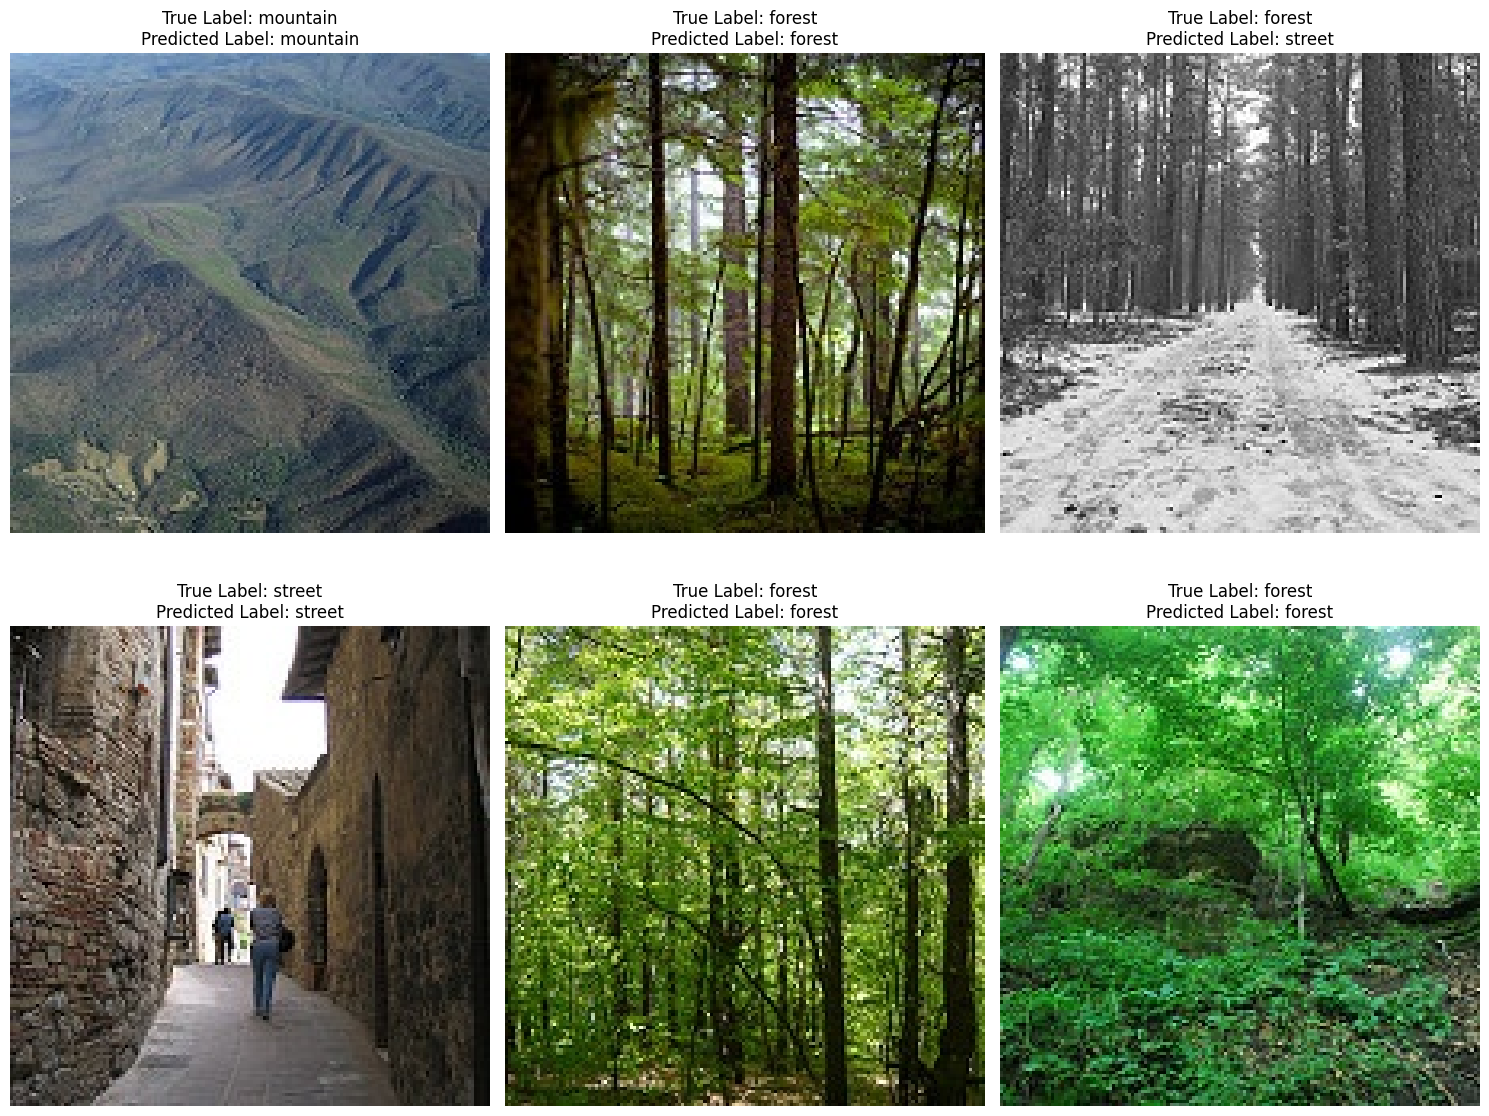

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test set
predictions = model.predict(test_images)

# Define function to plot images with predictions
def plot_random_sample_predictions(images, true_labels, predicted_labels, class_names, sample_size=6):
    plt.figure(figsize=(15, 12))
    
    # Get random indices for the sample
    random_indices = np.random.choice(len(images), sample_size, replace=False)
    
    for i, idx in enumerate(random_indices):
        img = images[idx]
        true_class = class_names[np.argmax(true_labels[idx])]
        predicted_class = class_names[np.argmax(predicted_labels[idx])]
        
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"True Label: {true_class}\nPredicted Label: {predicted_class}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display random sample predictions
plot_random_sample_predictions(test_images, test_labels, predictions, class_names)


### Step 7: Model deployment ###
Testing the saved model to predict the image downloaded from the internet.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


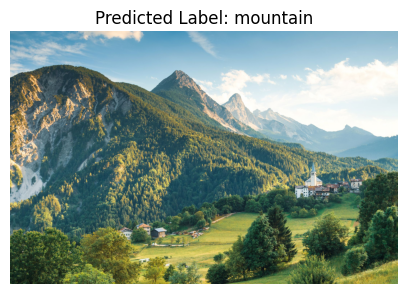

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import requests
from PIL import Image
from io import BytesIO

# Load the saved model
model = load_model('trained_cnn_model2.h5')

# Function to preprocess the new image
def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model input
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Download an image from the internet
image_url = 'https://hips.hearstapps.com/hmg-prod/images/alpe-di-siusi-sunrise-with-sassolungo-or-langkofel-royalty-free-image-1623254127.jpg'  # Replace with the actual URL of the image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Save the image locally
img.save('/Users/rameshchidurala/Documents/DSC-550 Assignments/alpe-di-siusi-sunrise-with-sassolungo-or-langkofel-royalty-free-image-1623254127.jpg')

# Preprocess the downloaded image
image_path = '/Users/rameshchidurala/Documents/DSC-550 Assignments/alpe-di-siusi-sunrise-with-sassolungo-or-langkofel-royalty-free-image-1623254127.jpg'
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions[0])
predicted_label = class_names[predicted_class]

# Plot the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


Testing Street Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


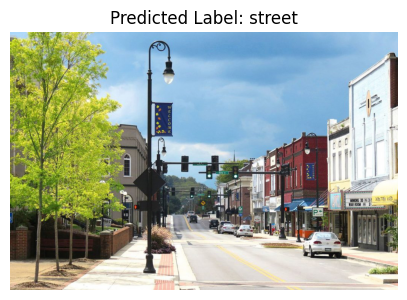

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import requests
from PIL import Image
from io import BytesIO

# Load the saved model
model = load_model('trained_cnn_model2.h5')

# Function to preprocess the new image
def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model input
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Download an image from the internet
image_url = 'https://smartgrowthamerica.org/wp-content/uploads/2022/03/complete-streets-feature-erwin-tennessee-main-street.jpg'  # Replace with the actual URL of the image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Save the image locally
img.save('/Users/rameshchidurala/Documents/DSC-550 Assignments/complete-streets-feature-erwin-tennessee-main-street.jpg')

# Preprocess the downloaded image
image_path = '/Users/rameshchidurala/Documents/DSC-550 Assignments/complete-streets-feature-erwin-tennessee-main-street.jpg'
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions[0])
predicted_label = class_names[predicted_class]

# Plot the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


13. Model Utilization and Performance Analysis

Model Utilization in Image Recognition:

The Convolutional Neural Network (CNN) model is utilized to recognize images from the dataset by extracting features through multiple convolutional and pooling layers. Here’s how the model works:

Data Preparation:

Images are loaded, resized to 150x150 pixels, and normalized to have pixel values in the range [0, 1].
Class labels are converted to one-hot encoded vectors to be used in categorical cross-entropy loss function.
Model Architecture:

Convolutional Layers: The model starts with four convolutional layers with ReLU activation, each followed by a max pooling layer. These layers help in extracting hierarchical features from the images.
Flatten Layer: The output of the convolutional layers is flattened to a 1D array.
Fully Connected Layers: A dense layer with 512 units and ReLU activation is added, followed by a dropout layer to prevent overfitting.
Output Layer: A dense layer with softmax activation provides the final classification output for the six classes.
Training and Evaluation:

The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy as the metric.
The model is trained for 85 epochs, and test data used for validation  to monitor performance on unseen data.
Eventhough I intaially chode 85 epochs I interupted kerenel after 40 epochs ran overnight. since it is taking lot of computational power and no improvement in accuracy. 
So , I built a model with 10 epochs with same parameters.
After training, the model is evaluated on the test set to determine its accuracy and loss.

Optimizer Choice and Performance:

The Adam optimizer was chosen for training the model due to its adaptive learning rate and efficient handling of sparse gradients on noisy problems. Here’s a comparison with two other optimizers:

Adam Optimizer:

Advantages: Adaptive learning rates, efficient computation, less memory requirement, and well-suited for large datasets and models.
Disadvantages: May require fine-tuning of learning rate and other hyperparameters.
Performance: Achieved a test accuracy of 0.8497 with stable convergence and relatively quick training time.

Stochastic Gradient Descent (SGD):

Advantages: Simple and easy to implement, works well with large datasets.
Disadvantages: Fixed learning rate can lead to slower convergence, may get stuck in local minima.
Performance: Typically requires more epochs to converge and may not perform as well as Adam on this dataset without additional tuning like momentum.

RMSprop:

Advantages: Adaptive learning rates, works well with non-stationary objectives.
Disadvantages: May require careful tuning of learning rate and decay parameters.
Performance: Similar to Adam but can sometimes perform worse if not tuned correctly.


(c) Analysis of the Findings
1. Model Performance:

After running the model for 10 epochs, the test accuracy achieved was approximately 84.97%. Although the model was initially set to run for 85 epochs, due to computational limitations I let it ran overnight for 40 epochs, then I interupted it because there is no change in performance and the final evaluation was conducted after 10 epochs due to practical constraints.

Training Accuracy: The training accuracy showed a steady improvement, indicating that the model was effectively learning from the training data.
Validation Accuracy: The validation accuracy closely followed the training accuracy, suggesting good generalization to unseen data.

2. Loss Curves:

The loss curves demonstrated effective learning and optimization by the model.

Training Loss: A consistent decrease in training loss was observed, signifying that the model was minimizing errors on the training set.
Validation Loss: The validation loss showed a decreasing trend initially, with slight fluctuations towards the end, which is typical and indicates the model balancing between fitting the training data and generalizing to validation data.

3. Prediction Analysis:

The model's performance on the test set was visualized by plotting random sample predictions, providing insight into the model's classification capability.

Correct Classifications: Many images were correctly classified, showcasing the model's ability to distinguish between different classes.
Misclassifications: Some images were misclassified, highlighting areas where the model might need improvement, possibly due to similar features between certain classes or insufficient distinguishing characteristics in the images.

4. Optimizer Choice:

The Adam optimizer was used, chosen for its adaptive learning rate and efficiency in handling sparse gradients and noisy data.

Adam Optimizer: It facilitated quicker convergence and provided robust performance, making it suitable for this image classification task.
Comparison to Other Optimizers: While other optimizers like SGD and RMSprop could also be effective, Adam's efficiency and effectiveness made it the preferred choice.

5. Computational Efficiency:

Training the model posed computational challenges, especially for longer epochs.

Training Time: The model required substantial computational resources and time, particularly noticeable when attempting to train for 85 epochs.

6. Areas for Improvement:

Data Augmentation: Implementing data augmentation could enhance model generalization by increasing training data diversity.
Hyperparameter Tuning: Further tuning of hyperparameters such as learning rate and batch size could improve performance.
Ensemble Methods: Utilizing ensemble methods could enhance accuracy and robustness by combining multiple model predictions.
But due to lack of resources (ex: Gpu) I havent done above steps.

Conclusion:

The CNN model demonstrated strong performance in classifying images from the dataset. Despite computational constraints, the model achieved a high accuracy of 84.97% after 10 epochs. The chosen architecture and optimizer proved effective, and the results validate the model's capability in image recognition tasks. Future improvements could be made through data augmentation, hyperparameter tuning, and exploring ensemble methods to further boost performance.

Recording Link: https://vimeo.com/955628349/c608b872ce?share=copy

(d) References

Kaggle. (2019). Intel Image Classification [Data set]. https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data

Szeliski, R. (2010). Computer Vision: Algorithms and Applications. Springer. https://doi.org/10.1007/978-1-84882-935-0